In [1]:
import pandas as pd
import numpy as np
import nltk

In [2]:
#!pip install tweepy

In [3]:
consumer_api='56tujEziXzQsndZH25Cyq8hid'
consumer_secret='6GUj1w4GqSCokvXICQp3CU6Z9kuYB4HjC1D114fXTOyotfI2fk'
access_token='1163599746-LG74Z7uaDvnPIt7elzWed6KuBDrLbsKfxfWHa92'
access_secret='Tagg1J9LwQ4VaSLtkbugO5SY8r353ZWdEn2pIkb0tVXs0'
#tokens from Twitter developer-keys and tokens

In [4]:
import tweepy

auth=tweepy.OAuthHandler(consumer_api,consumer_secret)
auth.set_access_token(access_token,access_secret)
api=tweepy.API(auth)#,wait_on_rate_limit=True)
#code form
#http://docs.tweepy.org/en/v3.5.0/auth_tutorial.html#oauth-authentication

In [5]:
#can scrape in 2 types
#1. REST API
#2. Twitter streaming api (can scapre it and store it in local machine)

# REST API

# scrape tweets from a user time line

In [6]:
screen_name='narendramodi'
tweets1=api.user_timeline(screen_name,count=200)
#scrapes recent 200 tweets from narendra modi account

200 tweets

In [7]:
for tweet in tweets1:
    print(tweet.text)
    print('------')  
    #will get all the 200 tweets # can verify goto narendramodi acccount

With the NDA family. 

Our alliance represents India's diversity and our agenda is India's progress. 

We are best… https://t.co/LuGIbws7d9
------
As our nations mark seven decades of our diplomatic relationship, I look forward to working closely with you to fur… https://t.co/NXKdXGD1U6
------
Heartiest congratulations @jokowi on your re-election! As two large democracies, we take collective pride in succes… https://t.co/O60iD0QAzs
------
Saat kita menandai tujuh dekade hubungan diplomatik kita, saya berharap dapat bekerja sama dengan Anda untuk semaki… https://t.co/8tf3W03dbI
------
Selamat yang sebesar-besarnya kepada @jokowi atas terpilihnya Anda kembali! Sebagai dua negara demokrasi besar, kam… https://t.co/56CZg0hYx0
------
Tributes to former PM Shri Rajiv Gandhi on his death anniversary.
------
Had a great interaction with officer trainees of 2018 batch of the Indian Foreign Service. We discussed India’s ris… https://t.co/F0TkKokj9o
------
Heartiest congratulations @ScottMorrison

In [8]:
for tweet in tweets1:
    print(tweet.created_at)#created_at,fav_count(how many likes),user.name,user.location,retweet_count,source(wchihc phoneandroid)
    print('------')

2019-05-21 16:47:47
------
2019-05-21 04:48:30
------
2019-05-21 04:48:29
------
2019-05-21 04:47:14
------
2019-05-21 04:47:12
------
2019-05-21 03:17:13
------
2019-05-20 14:33:29
------
2019-05-19 13:31:59
------
2019-05-19 09:18:31
------
2019-05-19 09:16:32
------
2019-05-19 09:13:39
------
2019-05-19 01:48:24
------
2019-05-18 10:17:11
------
2019-05-18 06:11:26
------
2019-05-18 06:08:50
------
2019-05-18 01:58:22
------
2019-05-18 01:48:36
------
2019-05-18 01:47:06
------
2019-05-17 10:38:24
------
2019-05-17 10:14:22
------
2019-05-17 10:14:12
------
2019-05-17 10:13:05
------
2019-05-17 10:12:53
------
2019-05-17 10:12:45
------
2019-05-17 06:41:15
------
2019-05-16 14:53:06
------
2019-05-16 14:52:58
------
2019-05-16 14:47:46
------
2019-05-16 14:41:18
------
2019-05-16 14:38:29
------
2019-05-16 14:31:47
------
2019-05-16 14:29:37
------
2019-05-16 14:11:42
------
2019-05-16 13:20:25
------
2019-05-16 11:36:51
------
2019-05-16 10:11:37
------
2019-05-16 10:08:19
------
2

#############

In [9]:
#pagination-every page will have max of 200 tweets

In [10]:
df_tweets=pd.DataFrame()
for page in range(1,20): #20
    tweets=api.user_timeline(screen_name,page=page,count=200) #max=20*200
    for tweet in tweets:
        curr_tweet={
            'text':tweet.text,
            'created_at':tweet.created_at,
            'favorites':tweet.favorite_count,
            'retweets':tweet.retweet_count,
            'lang':tweet.lang,
            'device':tweet.source
        }
        df_tweets=df_tweets.append(curr_tweet,ignore_index=True)

In [11]:
#api.rate_limit_status()  from this we can know for which key how much limit it has

In [12]:
df_tweets.head()

,created_at,device,favorites,lang,retweets,text
0,2019-05-21 16:47:47,Twitter for Android,56119.0,en,10446.0,With the NDA family. \n\nOur alliance represen...
1,2019-05-21 04:48:30,Twitter for iPhone,29057.0,en,3878.0,As our nations mark seven decades of our diplo...
2,2019-05-21 04:48:29,Twitter for iPhone,38761.0,en,5879.0,Heartiest congratulations @jokowi on your re-e...
3,2019-05-21 04:47:14,Twitter for iPhone,14544.0,in,2204.0,Saat kita menandai tujuh dekade hubungan diplo...
4,2019-05-21 04:47:12,Twitter for iPhone,25581.0,in,5216.0,Selamat yang sebesar-besarnya kepada @jokowi a...


In [13]:
df_tweets.to_csv('narendra_modi.csv',index=False)

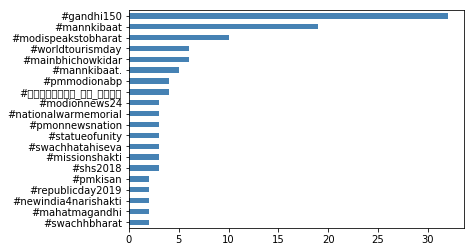

In [14]:
hashtags=[]
%matplotlib inline
for doc in df_tweets['text'].str.lower():
    words=doc.split(' ')
    tweet_hashtags=[word for word in words if word.startswith('#')]
    hashtags.extend(tweet_hashtags)
pd.Series(hashtags).value_counts().head(20)[::-1].plot.barh(color='steelblue')
#sandesh2soldiers  is the top tweet

# Scrape tweets from a hashtag

In [16]:
tweets=api.search('#ElectionResults2019')
len(tweets)

RateLimitError: [{'message': 'Rate limit exceeded', 'code': 88}]

In [17]:
tweets_elections=pd.DataFrame()
for tweet in tweepy.Cursor(api.search,'#ElectionResults2019').items(): 
    curr_tweet={
            'text':tweet.text,
            'created_at':tweet.created_at,
            'favorites':tweet.favorite_count,
            'retweets':tweet.retweet_count,
            'lang':tweet.lang,
            'device':tweet.source,
            'user_display_name':tweet.user.name,
            'user_screen_name':tweet.user.screen_name
           }
    tweets_elections=tweets_elections.append(curr_tweet,ignore_index=True)

TweepError: Twitter error response: status code = 429

In [18]:
tweets_elections.shape

(0, 0)

# Twitter Streaming API